<a href="https://colab.research.google.com/github/navneetslovely/Wifi_RSSI_localization/blob/main/simulation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import normalize
import matplotlib as mpl 
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import load_model

In [28]:
#fetching the data from the drive
fetch_training_sample= '/content/drive/My Drive/UJIndoorLoc/UJIndoorLoc/trainingData.csv'
fetch_validation_sample= '/content/drive/My Drive/UJIndoorLoc/UJIndoorLoc/validationData.csv'
                

In [29]:
#reading the data from CSV file using pandas
"""UJIindoorLoc has two files (training and validation) """
training_data = pd.read_csv(fetch_training_sample) # 
validation_data = pd.read_csv(fetch_validation_sample)

In [30]:
#creating the custom label
"""data contain 529 columns. Out of 529, 520 have Access points RSSIs values and rest of are longitude,latitude,buildingid, floor etc."""
#combining the both training and validation data
data = pd.concat((training_data,validation_data), ignore_index= True)
#for making new label coverting the data of column(buildingid and floor) into string, so that join opreation can be performed on axix=1 {1= column}  
data['BUILDINGID']=data.BUILDINGID.astype(str) #buildingid=0,1,2
data['FLOOR']=data.FLOOR.astype(str) #Floor=0,1,2,3,4,5
# lambda exp for join opreation and creating the new column for the new values (0.0,0.1,0.2,....,2.5)
data['newfeature'] = data[['BUILDINGID', 'FLOOR']].apply(lambda x:  '.'.join(x), axis=1) 
data[['newfeature']] = data[['newfeature']].apply(pd.to_numeric) #converting the generated string data into numeric (float)(0.0,0.1,0.2,....,2.5)
data['newfeature']=1000*data['newfeature']#(0.0,100.0,200.0,300.0,...,2500.0)
data['newfeature'] = data['newfeature'].astype(int) #changing the float into int(0.0,100.0,200.0,300.0,...,2500.0)
data.shape 

(21048, 530)

In [31]:
#divide the data into features and labels 
X=data.iloc[:,:520]# features/parameters/dimenssions
Y=data.iloc[:,520:]# labels/classs/

       WAP001  WAP002  WAP003  WAP004  ...  WAP517  WAP518  WAP519  WAP520
0         100     100     100     100  ...     100     100     100     100
1         100     100     100     100  ...     100     100     100     100
2         100     100     100     100  ...     100     100     100     100
3         100     100     100     100  ...     100     100     100     100
4         100     100     100     100  ...     100     100     100     100
...       ...     ...     ...     ...  ...     ...     ...     ...     ...
21043     100     100     100     100  ...     100     100     100     100
21044     100     100     100     100  ...     100     100     100     100
21045     100     100     100     100  ...     100     100     100     100
21046     100     100     100     100  ...     100     100     100     100
21047     100     100     100     100  ...     100     100     100     100

[21048 rows x 520 columns]
         LONGITUDE      LATITUDE FLOOR  ... PHONEID   TIMESTAMP  newfeat

In [32]:
X.replace(100,-98, inplace=True)
X[X < -98]= -98


In [33]:

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30, random_state=42)

In [34]:
X.shape[1]

520

In [35]:
X_train=preprocessing.normalize(X_train)
X_test=preprocessing.normalize(X_test)
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [36]:
#implementing the multi_layer Perceptron (MLP)  autoencoders custom  model
# define encoder
n_inputs = X.shape[1]
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
# n_bottleneck = n_inputs
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='relu')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mean_absolute_error')


Epoch 1/100
1053/1053 [==============================] - 6s 5ms/step - loss: 0.0487 - val_loss: 0.0438
Epoch 2/100
1053/1053 [==============================] - 5s 5ms/step - loss: 0.0438 - val_loss: 0.0439
Epoch 3/100
1053/1053 [==============================] - 5s 5ms/step - loss: 0.0438 - val_loss: 0.0438
Epoch 4/100
1053/1053 [==============================] - 5s 5ms/step - loss: 0.0438 - val_loss: 0.0438
Epoch 5/100
1053/1053 [==============================] - 5s 5ms/step - loss: 0.0438 - val_loss: 0.0438
Epoch 6/100
1053/1053 [==============================] - 5s 5ms/step - loss: 0.0438 - val_loss: 0.0438
Epoch 7/100
1053/1053 [==============================] - 5s 5ms/step - loss: 0.0438 - val_loss: 0.0438
Epoch 8/100
1053/1053 [==============================] - 5s 5ms/step - loss: 0.0438 - val_loss: 0.0438
Epoch 9/100
1053/1053 [==============================] - 5s 5ms/step - loss: 0.0438 - val_loss: 0.0438
Epoch 10/100
1053/1053 [==============================] - 5s 5ms/step - l

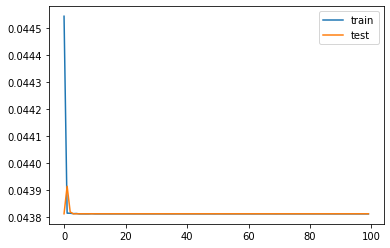

In [37]:
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=100, batch_size=14, verbose=1, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

Epoch 1/100
1474/1474 [==============================] - 7s 5ms/step - loss: 0.0438 - val_loss: 0.0438
Epoch 2/100
1474/1474 [==============================] - 7s 5ms/step - loss: 0.0438 - val_loss: 0.0438
Epoch 3/100
1474/1474 [==============================] - 7s 5ms/step - loss: 0.0438 - val_loss: 0.0438
Epoch 4/100
1474/1474 [==============================] - 7s 5ms/step - loss: 0.0438 - val_loss: 0.0438
Epoch 5/100
1474/1474 [==============================] - 7s 5ms/step - loss: 0.0438 - val_loss: 0.0438
Epoch 6/100
1474/1474 [==============================] - 7s 5ms/step - loss: 0.0438 - val_loss: 0.0438
Epoch 7/100
1474/1474 [==============================] - 7s 5ms/step - loss: 0.0438 - val_loss: 0.0438
Epoch 8/100
1474/1474 [==============================] - 7s 5ms/step - loss: 0.0438 - val_loss: 0.0438
Epoch 9/100
1474/1474 [==============================] - 7s 5ms/step - loss: 0.0438 - val_loss: 0.0438
Epoch 10/100
1474/1474 [==============================] - 7s 5ms/step - l

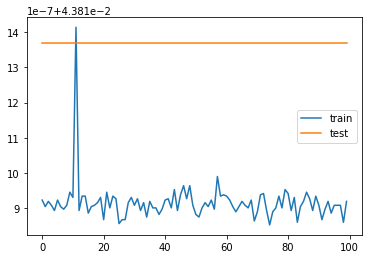

In [38]:
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress_1.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=100, batch_size=10, verbose=1, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress_1.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder_1.h5')

In [40]:
from sklearn.metrics import mean_absolute_error

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc',svm_clf)],
                              voting= 'hard')
voting_clf.fit(X_train,y_train['newfeature'])
for clf in (log_clf,rnd_clf, svm_clf,voting_clf):
    clf.fit(X_train,y_train['newfeature'])
    y_pred= clf.predict(X_test)
print(accuracy_score(y_test['newfeature'],y_pred))
print(confusion_matrix(y_test['newfeature'], y_pred),"new combined feature \n")
print(classification_report(y_test['newfeature'], y_pred),"new combined feature \n")
err=mean_absolute_error(y_test['newfeature'], y_pred)
print(err)

0.9897070467141726
[[340   5   0   0   0   0   0   0   0   0   0   0   0]
 [  3 451   0   0   0   0   0   0   0   0   0   0   0]
 [  1   1 486   0   0   0   0   0   0   0   0   0   0]
 [  0   0   2 453   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 416   5   0   0   0   0   0   0   0]
 [  0   0   0   0   8 484   3   0   0   0   0   0   0]
 [  0   0   0   0   0   1 418   1   0   0   0   0   0]
 [  0   0   0   0   0   0   3 300   0   0   0   0   0]
 [  0   0   0   0   0   0   0  14 569   2   0   0   0]
 [  0   0   0   0   0   0   0   0   0 694   0   0   0]
 [  0   0   0   0   0   0   0   1   0   4 484   2   0]
 [  0   0   0   0   0   0   0   0   0   0   0 828   1]
 [  0   0   0   0   0   0   0   0   0   0   0   8 327]] new combined feature 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       345
         100       0.99      0.99      0.99       454
         200       1.00      1.00      1.00       488
         300       1.00  

In [41]:

encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)



log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc',svm_clf)],
                              voting= 'hard')
voting_clf.fit(X_train,y_train['newfeature'])
for clf in (log_clf,rnd_clf, svm_clf,voting_clf):
    clf.fit(X_train_encode,y_train['newfeature'])
    y_pred= clf.predict(X_test_encode)
print(accuracy_score(y_test['newfeature'],y_pred))
print(confusion_matrix(y_test['newfeature'], y_pred),"new combined feature \n")
print(classification_report(y_test['newfeature'], y_pred),"new combined feature \n")
err=mean_absolute_error(y_test['newfeature'], y_pred)
print(err)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9859065716547902
[[336   8   1   0   0   0   0   0   0   0   0   0   0]
 [  3 448   3   0   0   0   0   0   0   0   0   0   0]
 [  0   1 486   1   0   0   0   0   0   0   0   0   0]
 [  0   0   4 451   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 410   6   3   2   0   0   0   0   0]
 [  0   0   0   0   6 486   3   0   0   0   0   0   0]
 [  0   0   0   0   0   2 416   2   0   0   0   0   0]
 [  0   0   0   0   0   0   4 299   0   0   0   0   0]
 [  0   0   0   0   0   0   0  10 574   1   0   0   0]
 [  0   0   0   0   0   0   0   1   0 685   8   0   0]
 [  0   0   0   0   0   0   1   0   0   5 484   1   0]
 [  0   0   0   0   0   0   0   0   0   1   1 826   1]
 [  0   0   0   0   0   0   0   0   0   0   0  10 325]] new combined feature 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       345
         100       0.98      0.99      0.98       454
         200       0.98      1.00      0.99       488
         300       1.00  

In [42]:
encoder1 = load_model('encoder_1.h5')
# encode the train data
X_train_encode = encoder1.predict(X_train)
# encode the test data
X_test_encode = encoder1.predict(X_test)



log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc',svm_clf)],
                              voting= 'hard')
voting_clf.fit(X_train,y_train['newfeature'])
for clf in (log_clf,rnd_clf, svm_clf,voting_clf):
    clf.fit(X_train_encode,y_train['newfeature'])
    y_pred= clf.predict(X_test_encode)
print(accuracy_score(y_test['newfeature'],y_pred))
print(confusion_matrix(y_test['newfeature'], y_pred),"new combined feature \n")
print(classification_report(y_test['newfeature'], y_pred),"new combined feature \n")
err=mean_absolute_error(y_test['newfeature'], y_pred)
print(err)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9135391923990499
[[308  35   1   0   0   0   1   0   0   0   0   0   0]
 [ 16 421  16   0   0   0   1   0   0   0   0   0   0]
 [  0   5 476   7   0   0   0   0   0   0   0   0   0]
 [  0   0  12 443   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 353  65   3   0   0   0   0   0   0]
 [  0   0  10   0  68 391  26   0   0   0   0   0   0]
 [  0   0   0   0  16   7 394   3   0   0   0   0   0]
 [  0   0   0   0   0   0  94 209   0   0   0   0   0]
 [  0   0   0   0   6   0  10   4 561   4   0   0   0]
 [  0   0   0   0   6   0   1   2  14 665   6   0   0]
 [  0   0   0   0   1   0   0  10   1  19 443  17   0]
 [  0   0   0   0   0   0   2  16   3   0   1 805   2]
 [  0   0   0   0   0   0   0   2   0   0   2  31 300]] new combined feature 

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       345
         100       0.91      0.93      0.92       454
         200       0.92      0.98      0.95       488
         300       0.98  

In [45]:
rnd_clf= RandomForestClassifier()
rnd_clf.fit(X_train_encode,y_train['newfeature'])
y_pred_rf= rnd_clf.predict(X_test_encode)
print(accuracy_score(y_test['newfeature'],y_pred))
print(confusion_matrix(y_test['newfeature'], y_pred),"new combined feature \n")
print(classification_report(y_test['newfeature'], y_pred),"new combined feature \n")
err=mean_absolute_error(y_test['newfeature'], y_pred)
print(err)

0.9135391923990499
[[308  35   1   0   0   0   1   0   0   0   0   0   0]
 [ 16 421  16   0   0   0   1   0   0   0   0   0   0]
 [  0   5 476   7   0   0   0   0   0   0   0   0   0]
 [  0   0  12 443   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 353  65   3   0   0   0   0   0   0]
 [  0   0  10   0  68 391  26   0   0   0   0   0   0]
 [  0   0   0   0  16   7 394   3   0   0   0   0   0]
 [  0   0   0   0   0   0  94 209   0   0   0   0   0]
 [  0   0   0   0   6   0  10   4 561   4   0   0   0]
 [  0   0   0   0   6   0   1   2  14 665   6   0   0]
 [  0   0   0   0   1   0   0  10   1  19 443  17   0]
 [  0   0   0   0   0   0   2  16   3   0   1 805   2]
 [  0   0   0   0   0   0   0   2   0   0   2  31 300]] new combined feature 

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       345
         100       0.91      0.93      0.92       454
         200       0.92      0.98      0.95       488
         300       0.98  